<a href="https://colab.research.google.com/github/marelycarcamo/Challenge1-Tiendas/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Challenge 1. Tiendas.


## Primera Etapa. Preparación de Datos

### Paso 1. Instalación de librerías requeridas

In [1]:
!pip install unidecode

### Paso 2. Importar y obtener las versiones de las librerías necesarias.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from matplotlib import colors as colors
from unidecode import unidecode
import sys

print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Matplotlib: {mpl.__version__}')
print(f'Python: {sys.version}')



Pandas: 2.2.2
Seaborn: 0.13.2
Matplotlib: 3.10.0
Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


### Paso 3. Obtener datos y mostrar los primeros registros

In [3]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### Paso 4. Iterar sobre los archivos csv para visualizar las columnas.

In [4]:
for df in [tienda1, tienda2, tienda3, tienda4]:
    print(df.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


### Paso 5. Creamos un columna 'tienda' y concatenamos las tiendas en un único dataframe.

In [5]:
# Creamos una columna 'Tienda', para el identificador de tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenamos las tiendas en un único dataframe.
df_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
df_tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


## Segunda Fase. Exploración de los Datos

### Paso 1. Ver información General del Dataset:
Nombre de las columnas, conteo, los datos nulos, tipos de datos, conteo de tipo de datos.

In [6]:
df_tiendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


### Paso 2. Obtenemos el número de filas y columnas.
La idea es tener una idea de la dimensión del dataframe, podemos obtener como resultado que el dataset tiene 9435 filas y 13 columnas.

In [7]:
df_tiendas.shape  #El dataset tiene 9435 filas y 13 columnas.
print(f'El dataset tiene {df_tiendas.shape[0]} filas y {df_tiendas.shape[1]} columnas.')

El dataset tiene 9435 filas y 13 columnas.


### Paso 3. Resumen Estadístico de los Datos Numéricos.
Muestra un resumen estadístico con los datos numéricos: conteo, promedio, STD, dato mínimo, dato máximo, etc.*texto en cursiva*


In [8]:
df_tiendas.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,9.435000e+03,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,4.014520,2.927398,5.428909,-74.760108
std,5.903207e+05,31480.036346,1.390518,2.802776,2.355663,1.207155
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.520000e+04,3000.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.215000e+05,11700.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.633000e+05,34900.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900


## Tercera Fase. Limpieza de Datos

### Paso 1. Eliminar Acentos y Reemplazar Nombres de Columnas.

In [9]:
def limpiar_columnas(df):
    # Convertir las columnas a pandas.Index después de procesarlas
    df.columns = pd.Index([unidecode(col).lower().replace(" ", "_") for col in df.columns])
    df.columns = df.columns.str.replace('_de_', '_', regex=False)\
    .str.replace('_del_', '_', regex=False)\
    .str.replace(r'\blat\b', 'latitud', regex=True)\
    .str.replace(r'\blon\b', 'longitud', regex=True)
    return

# Con regex evitamos que se interprete como expresiones regulares.
limpiar_columnas(df_tiendas)
df_tiendas.columns

Index(['producto', 'categoria_producto', 'precio', 'costo_envio',
       'fecha_compra', 'vendedor', 'lugar_compra', 'calificacion',
       'metodo_pago', 'cantidad_cuotas', 'latitud', 'longitud', 'tienda'],
      dtype='object')

### Normalización de Datos.
Con la normalización se busca reducir inconsistencias. Eliminamos espacios en blanco y estandarizar uso de mayúsculas y minúsculas.

### Verificación de Registros Duplicados.
Dado que no se encontraron duplicados, no se requiere de acciones adicionales.

In [12]:
#Verificar si hay duplicados
print(f'En el dataframe df_tiendas hay ', df_tiendas.duplicated().sum(), 'duplicados')

En el dataframe df_tiendas hay  0 duplicados


###  Verificación de Valores Nulos.


In [10]:
textos_lower = ['producto', 'categoria_producto','metodo_pago','tienda']
textos_title = ['vendedor', 'lugar_compra']


def normalizar_texto(df, columnas_lower=[], columnas_title=[]):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip()
    for col in columnas_lower:
        df[col] = df[col].str.lower()
    for col in columnas_title:
        df[col] = df[col].str.title()
    return df
df_tiendas = normalizar_texto(df_tiendas, columnas_lower=textos_lower, columnas_title=textos_title)


df_tiendas.head()

,producto,categoria_producto,precio,costo_envio,fecha_compra,vendedor,lugar_compra,calificacion,metodo_pago,cantidad_cuotas,latitud,longitud,tienda
0,asistente virtual,electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,tarjeta de crédito,8,4.60971,-74.08175,tienda 1
1,mesa de comedor,muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,tarjeta de crédito,4,6.25184,-75.56359,tienda 1
2,juego de mesa,juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,tarjeta de crédito,1,10.39972,-75.51444,tienda 1
3,microondas,electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,nequi,1,3.43722,-76.52250,tienda 1
4,silla de oficina,muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,nequi,1,6.25184,-75.56359,tienda 1


### Especificar Tipo de Dato para Datos Object

In [11]:
# Especificando tipo de datos para datos object
df_tiendas['fecha_compra'] = pd.to_datetime(df_tiendas['fecha_compra'],dayfirst=True)
categoricas = ['producto', 'categoria_producto', 'vendedor', 'lugar_compra', 'metodo_pago','tienda']


for col in categoricas:
    df_tiendas[col] = df_tiendas[col].astype('category')

df_tiendas.dtypes

,0
producto,category
categoria_producto,category
precio,float64
costo_envio,float64
fecha_compra,datetime64[ns]
vendedor,category
lugar_compra,category
calificacion,int64
metodo_pago,category
cantidad_cuotas,int64


In [13]:
# Verificar si hay valores nulos
df_tiendas.isnull().sum()  # No hay valores nulos
df_tiendas_nulos = df_tiendas.isnull().sum()
df_tiendas_nulos.to_frame()

# Poner nombre a las columnas de df_tiendas_nulos
df_tiendas_nulos.columns = 'valores_nulos'
df_tiendas_nulos


,0
producto,0
categoria_producto,0
precio,0
costo_envio,0
fecha_compra,0
vendedor,0
lugar_compra,0
calificacion,0
metodo_pago,0
cantidad_cuotas,0


## Cuarta Fase. Análisis de Datos y Visualización



### Paso 1. Ingresos Totales por Cada Tienda

#### Cálculo de Total Facturado por Tienda.
Sumando los valores de la columna `precio` de cada conjunto de datos de la `tienda` para estimar los ingresos.

In [15]:
# Cambiamos la configuración de Panda para tener los resultados con formato estándar.
pd.set_option('display.float_format', ' |  {:,.0f}'.format)

df_facturacion = df_tiendas.groupby('tienda', observed=True)['precio'].sum().reset_index()

df_facturacion

,tienda,precio
0,tienda 1,"| 1,150,880,400"
1,tienda 2,"| 1,116,343,500"
2,tienda 3,"| 1,098,019,600"
3,tienda 4,"| 1,038,375,700"


#### Generando Gráfico para Representar Porcentaje de Participación de Cada Tienda en el Total Facturado.

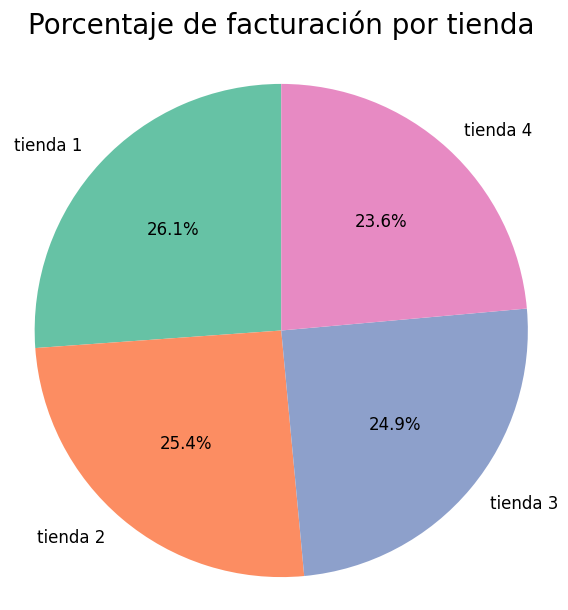

In [16]:
# Datos
labels = df_facturacion['tienda'].to_list()
sizes = df_facturacion['precio']

# Colores suaves (opcional)
colores = plt.cm.Set2.colors # type: ignore[override]

# Gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',   # porcentaje con 1 decimal
    startangle=90,
    colors=colores,
    textprops={'fontsize': 12}
)

# Título y formato
plt.title('Porcentaje de facturación por tienda', fontsize=20, pad=20)
plt.axis('equal')  # Mantiene forma circular

plt.show()

## Paso 2. Ventas por categoría

### Calcular la cantidad de productos vendidos por categoría en cada tienda.
 La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [27]:
# Calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.
print(f'Total de categorías: {df_tiendas["categoria_producto"].nunique()}')
print(f'Total de productos: {df_tiendas["producto"].nunique()}')

df_categorias = df_tiendas.groupby(['tienda', 'categoria_producto'],observed=True)['categoria_producto'].count().unstack()

df_categorias

Total de categorías: 8
Total de productos: 51


categoria_producto,artículos para el hogar,deportes y diversión,electrodomésticos,electrónicos,instrumentos musicales,juguetes,libros,muebles
tienda,,,,,,,,
tienda 1,171,284,312,448,182,324,173,465
tienda 2,181,275,305,422,224,313,197,442
tienda 3,177,277,278,451,177,315,185,499
tienda 4,201,277,254,451,170,338,187,480


### Calcular las calificaciones promedio de los clientes para cada tienda.
El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [19]:
df_calificacion = df_tiendas.groupby('tienda',observed=True)['calificacion'].mean().reset_index()
df_calificacion

,tienda,calificacion
0,tienda 1,| 4
1,tienda 2,| 4
2,tienda 3,| 4
3,tienda 4,| 4


#### Gráfico Represetativo Respecto a los Promedios de la Calificación de las Tiendas.

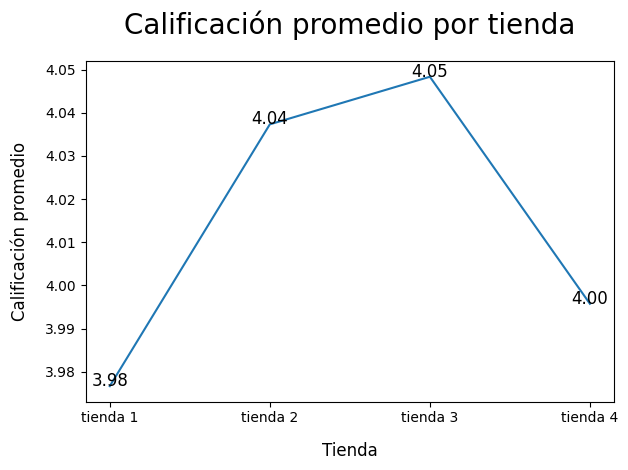

In [20]:
# Crea gráfico de línea con seaborn
sns.lineplot(data=df_calificacion, x='tienda', y='calificacion')

# Mostrar valores encima de cada barra
for i, valor in enumerate(df_calificacion['calificacion']):
    plt.text(i, valor , str(f'{valor:.2f}'), ha='center', fontsize=12)

# Títulos y estilos
plt.title('Calificación promedio por tienda', fontsize=20, pad=20)
plt.ylabel('Calificación promedio',fontsize=12,labelpad=12)
plt.xlabel('Tienda',fontsize=12,labelpad=12)
plt.tight_layout()
plt.show()

### Paso 4. Productos más y menos vendidos


#### Primero Calculamos los Productos mas Vendidos por Tienda.
Agrupamos los productos de cada tienda, ordenamos de forma descendente y seleccionamos solo el primer registro dentro de cada grupo de la tienda. Esto efectivamente aísla el producto más vendido por cada tienda.

In [21]:
df_top = df_tiendas.groupby(['tienda', 'producto'], observed=True).size()\
                  .sort_values(ascending=False)\
                  .groupby(level=0).head(1).to_frame()

df_top

#.groupby(level=0).head(1): Este es un paso crucial. Reagrupa los datos por el primer nivel del índice jerárquico (que es tienda) y luego selecciona solo el primer registro dentro de cada grupo de tienda. Esto efectivamente aísla el producto más vendido para cada tienda.

,,0
tienda,producto,
tienda 2,iniciando en programación,65
tienda 4,cama box,62
tienda 1,tv led uhd 4k,60
tienda 3,kit de bancas,57


#### Seguido, Calculamos los Productos Menos Vendidos por Tienda.
Agrupamos los productos por tienda, ordenamos y aíslamos el primero del registro de cada tienda.

In [22]:
df_bottom = df_tiendas.groupby(['tienda','producto',], observed=True).size()\
                     .sort_values(ascending=True)\
                     .groupby(level=0).head(1).to_frame()

df_bottom

,,0
tienda,producto,
tienda 2,juego de mesa,32
tienda 1,auriculares con micrófono,33
tienda 4,guitarra eléctrica,33
tienda 3,bloques de construcción,35


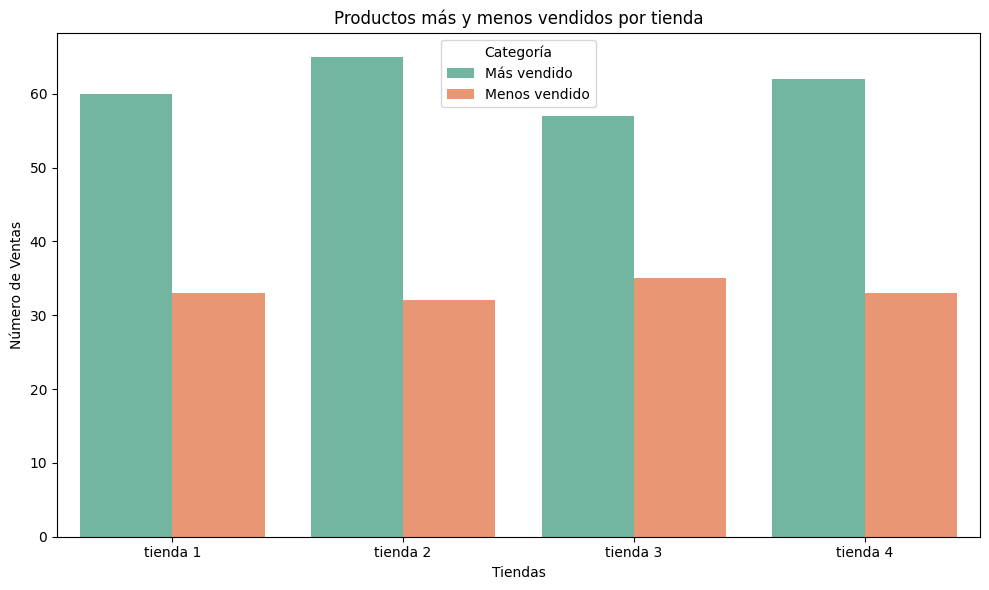

In [23]:
# Crear un DataFrame combinado (similar al que se hizo con pandas)

# Renombrar columnas del DataFrame df_top
df_top_renamed = df_top.rename(columns={0: 'Más vendido'})

# Renombrar columnas del DataFrame df_bottom
df_bottom_renamed = df_bottom.rename(columns={0: 'Menos vendido'})

# Combinar los dos DataFrames
df_combined = pd.concat([df_top_renamed, df_bottom_renamed], axis=1)

# Restablecer el índice
df_combined = df_combined.reset_index()


# Transformar el DataFrame para que sea más fácil usarlo en seaborn

df_melted = df_combined.melt(id_vars='tienda', value_vars=['Más vendido','Menos vendido'],var_name='Categoría', value_name='Número de Ventas')

# Crear el gráfico apilado
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted,
            x='tienda',
            y='Número de Ventas',
            hue='Categoría',
            palette='Set2',
            estimator=sum) # type: ignore[override]

plt.title('Productos más y menos vendidos por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Número de Ventas')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

#### Gráfico Representativo de las Mayores y Menores Ventas por Tienda.

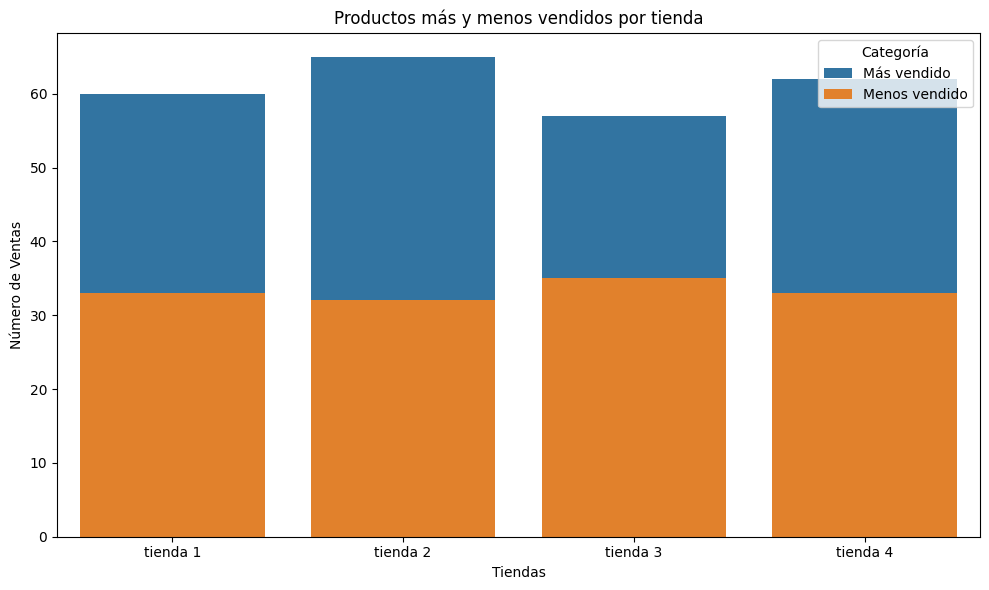

In [24]:
# Combinar los DataFrames
df_combined = pd.concat([
    df_top.rename(columns={0: 'Más vendido'}),
    df_bottom.rename(columns={0: 'Menos vendido'})
], axis=1).reset_index()

# Transformar el DataFrame a formato largo (melt)
df_melted = df_combined.melt(
    id_vars='tienda',  # La columna que queremos mantener como identificador
    value_vars=['Más vendido', 'Menos vendido'],  # Las columnas que se apilan
    var_name='Categoría',  # Nombre de la nueva columna para las categorías
    value_name='Número de Ventas'  # Nombre para los valores apilados
)

# Crear el gráfico con seaborn
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_melted,
    x='tienda',
    y='Número de Ventas',
    hue='Categoría',  # Diferencia las categorías con colores
    estimator=sum,  # type: ignore[override] # Usa la suma como valor para la barra
    dodge=False  # type: ignore[override] # Ajusta las barras para que estén apiladas  # type: ignore[override]
)

# Personalización del gráfico
plt.title('Productos más y menos vendidos por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Número de Ventas')
plt.legend(title='Categoría')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Paso 5. Envío promedio por tienda

#### Dataframe con los costos de envío por tienda.

In [25]:
df_envio_promedio = df_tiendas.groupby('tienda',observed=True)['costo_envio'].mean().reset_index()

x = df_envio_promedio['tienda']
y = df_envio_promedio['costo_envio']

df_envio_promedio


,tienda,costo_envio
0,tienda 1,"| 26,019"
1,tienda 2,"| 25,216"
2,tienda 3,"| 24,806"
3,tienda 4,"| 23,459"


#### Gráfica Representativa de los Costos de Envío por Tienda.

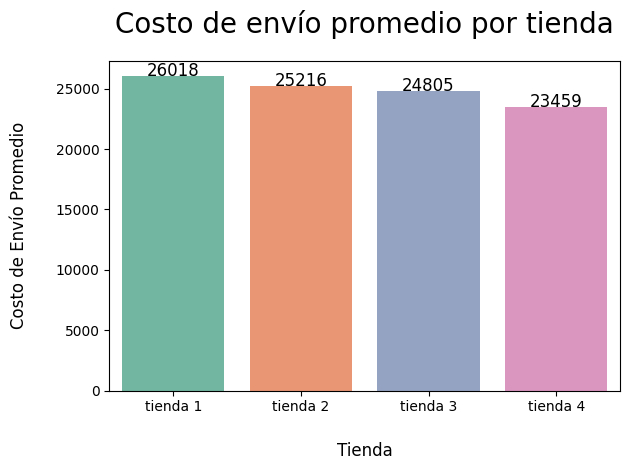

In [26]:
sns.barplot(data=df_envio_promedio, x='tienda', y='costo_envio',palette='Set2')

# Agregar etiquetas con 1 decimal
#
plt.title('Costo de envío promedio por tienda',fontsize=20, pad=20)
plt.xlabel('Tienda')
plt.xlabel('Tienda',fontsize=12,labelpad=20)
plt.ylabel('Costo de Envío Promedio',fontsize=12, labelpad=20)

# Mostrar valores encima de cada barra
for i, valor in enumerate(df_envio_promedio['costo_envio']):
    plt.text(i, valor +2.5 , str(int(valor)), ha='center', fontsize=12)

# Ajustar márgenes
plt.tight_layout()
plt.show()
